In [1]:
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Implement 1D Convolution in Python (no libraries)

### Without using for loops 

In [117]:
# 1D convolution without using for loops
def convolution(x, h):
    X = np.size(x)
    H = np.size(h)
    h_matrix = [[np.zeros(H)] for i in range(X+H-1)]
    # from h_0 to col number, add 0 weights to all other x elements
    h_matrix[:H] = [np.concatenate((h[:j:][::-1],np.zeros(H-j))) for j in range(1,H+1)]
    # from (col number - H)+1 to end off h, prepend with 0's
    h_matrix[H:] = [np.concatenate((np.zeros(j),h[j::][::-1])) for j in range(1,H)]
    # matrix multiplication: x^T*h_matrix
    print(len(h_matrix))
    y = np.array([sum([x[i]*h_col[i] for i in range(len(h_col))]) for h_col in h_matrix])
    return y

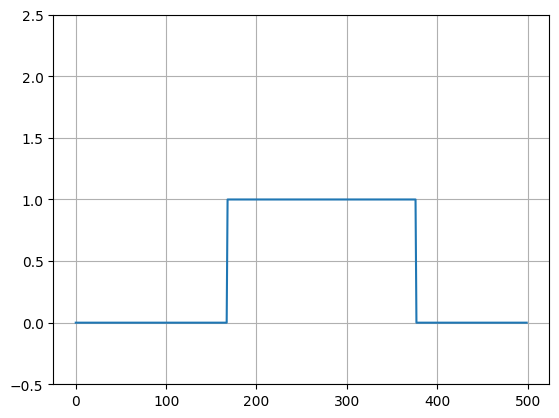

In [118]:
t = np.linspace(0.15, 0.35, 500, endpoint=False)

plt.ylim(-0.5, 2.5)
sig1 = signal.square(2 * np.pi * 5.99 * t+4.4)+1
sig1 = sig1/2
plt.plot(sig1)
plt.grid('on')

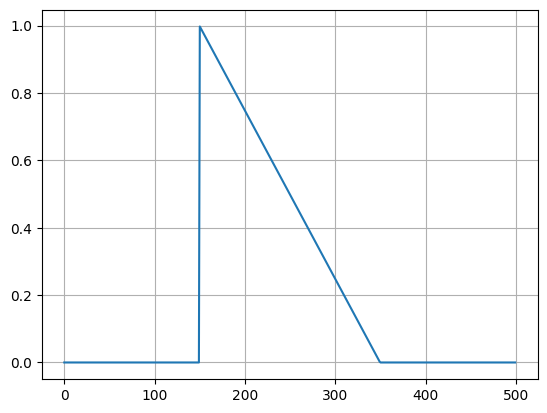

In [119]:
sigt = np.zeros_like(sig1)
sigt[150:350] = signal.triang(400)[200:]
plt.plot(sigt)
plt.grid('on')

In [120]:
len(sigt)

500

999
(999,)


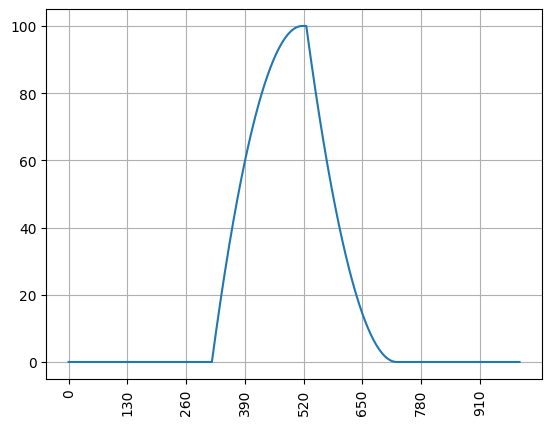

In [121]:
y_1 = convolution(sig1,sigt)
print(y_1.shape)
plt.plot(y_1)
plt.grid('on')
_=plt.xticks(np.arange(0,1000,130),rotation=90)

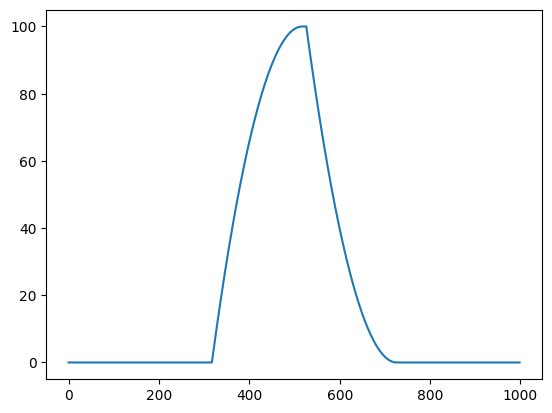

In [122]:
plt.plot(np.convolve(sig1,sigt,'full'))

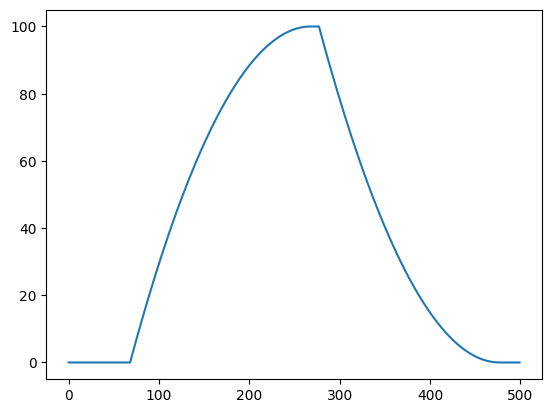

In [123]:
plt.plot(np.convolve(sig1,sigt,'same'))

In [124]:
np.convolve(sig1,sigt,'valid')

array([99.19])

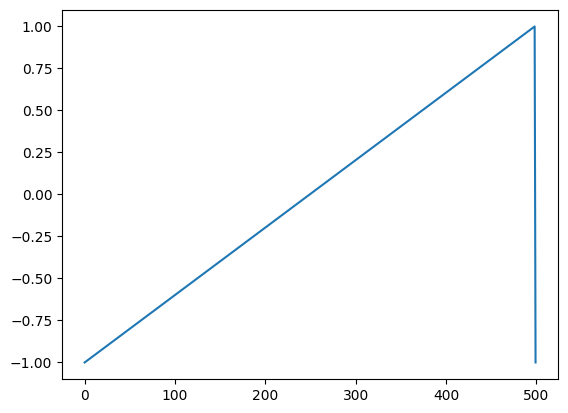

In [125]:
t = np.linspace(0, 0.2, 500)

sig2 = signal.sawtooth(2 * np.pi * 5 * t)
plt.plot(sig2)

In [126]:
out = convolution(sig1,sig2)

999


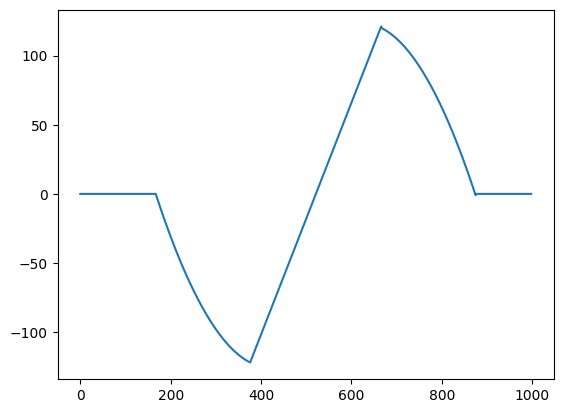

In [127]:
plt.plot(out)
#plt.plot(np.convolve(sig1,sig2,'full'))

In [128]:
out.shape

(999,)

In [129]:
sig2.shape

(500,)

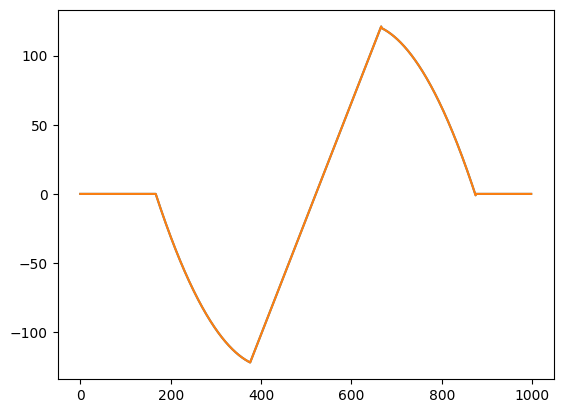

In [130]:
plt.plot(out)
plt.plot(np.convolve(sig1,sig2,'full'))

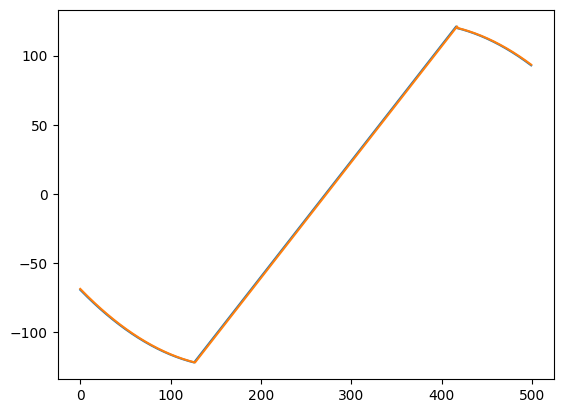

In [131]:
plt.plot(out[250:750])
plt.plot(np.convolve(sig1,sig2,'same'))

(-2.0, 2.0)

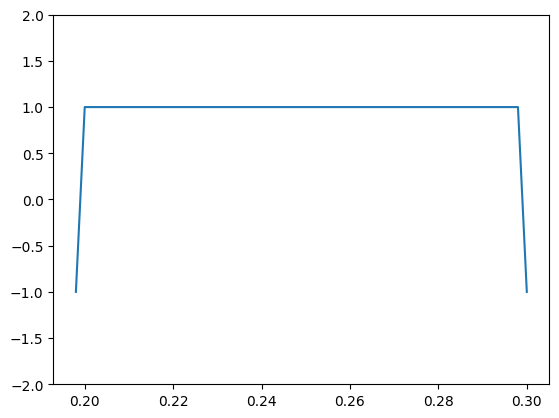

In [132]:
t = np.linspace(0.0, 1.0, 500, endpoint=False)
t1 = t[99:151]
temp = signal.square(2 * np.pi * 5 * t1)
plt.plot(t1,temp)
plt.ylim(-2, 2)

(-2.0, 2.0)

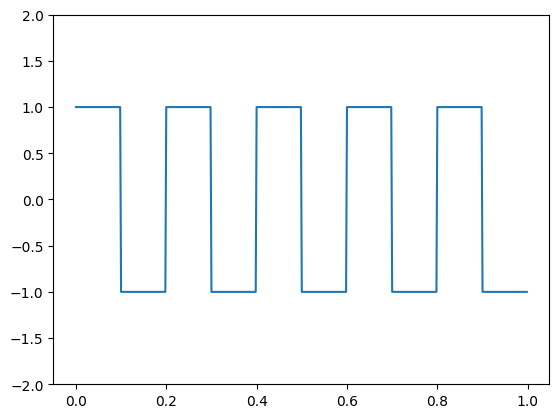

In [134]:
sig1 = signal.square(2 * np.pi * 5 * t)


plt.plot(t,sig1)
plt.ylim(-2, 2.0)

103


ValueError: x and y must have same first dimension, but have shapes (551,) and (103,)

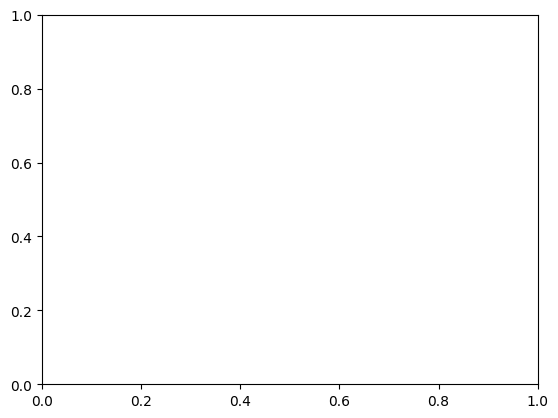

In [135]:
c = convolution(sig1,temp)

t2 = np.linspace(0, 1.0, 551, endpoint=False)
plt.plot(t2,c)

In [136]:
sigN = sig1+np.random.normal(0,2,500)

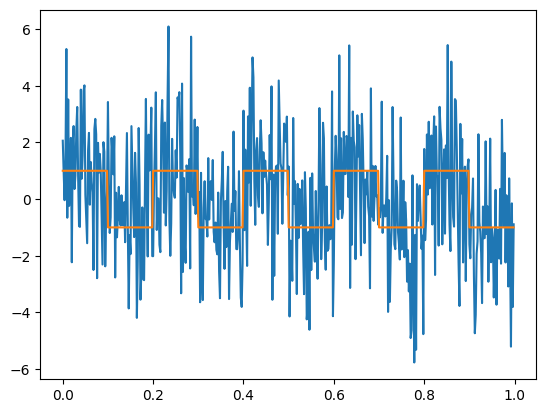

In [137]:
plt.plot(t,sigN)
plt.plot(t,sig1)

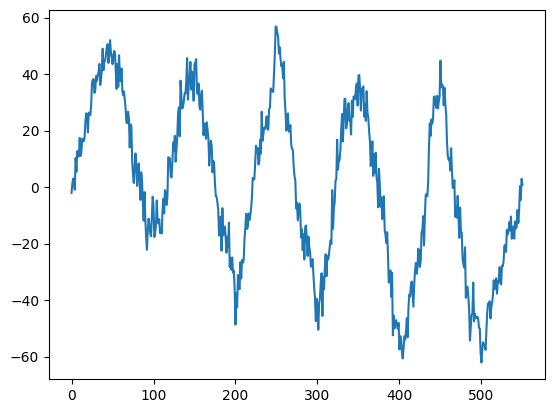

In [138]:
c = np.convolve(sigN,temp)
#t2 = np.linspace(0, 1.0, 551, endpoint=False)
plt.plot(c)

In [139]:
from scipy import signal
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_83054/3409646347.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


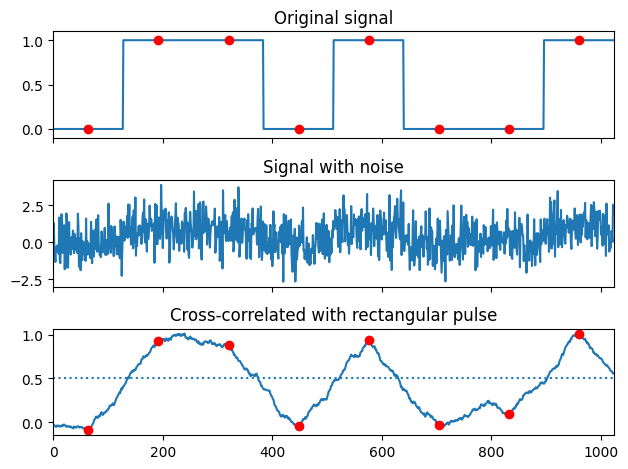

In [140]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

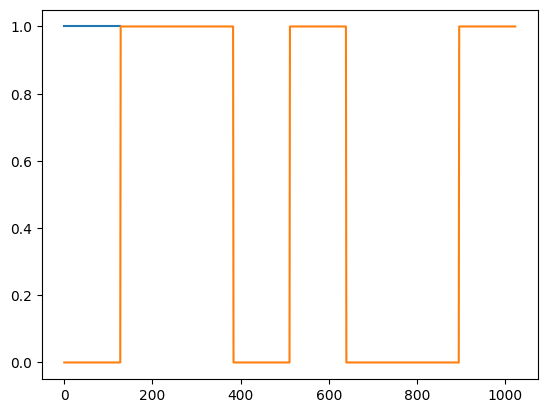

In [141]:
plt.plot(np.ones(128))
plt.plot(sig)